# Part II - (An Overview of Factors Influencing Loan Grants)
## by (Joy C. Mokalo)

## Investigation Overview


> The aim of analysing the Prosper Loan data set was to uncover factors that had some kind of influence on loan amount from a group of factors provided. It was discovered that factors like monthly loan payment, location and income range influenced loan amount granted.


## Dataset Overview

> This data set gives information on 113,937 loans given by Prosper with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others from 2005 to 2014. The data set provides details on general borrower information and performances of the loans.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('df_loan.csv')
list(df_loan)

['Term',
 'LoanStatus',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'IncomeRange',
 'Recommendations',
 'LoanOriginalAmount',
 'Year',
 'LoanCurrentDaysDelinquent',
 'StatedMonthlyIncome',
 'IsBorrowerHomeowner',
 'MonthlyLoanPayment',
 'Month']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Loan Original Amount Distribution
### To have an overview of loan amounts granted, the distribution of loan original amount was plotted and this showed that majority of individuals took \\$4,000 loans. Other prominent amounts are \\$10, 000, \\$15,000, followed by \\$5,000, \\$3,000 and \\$2,000

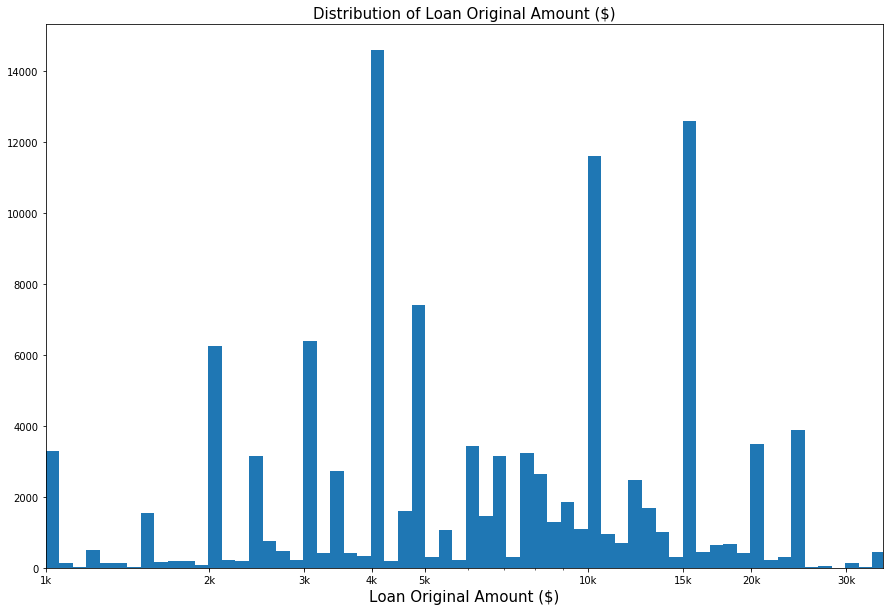

In [3]:
# plot to show loan original amount against a log scale
plt.figure(figsize = [15, 10]) 
log_binsize = 0.025
bins_log = 10 ** np.arange(3, np.log10(df_loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins_log)
plt.xscale('log')
x_ticks = [1000, 2000, 3000, 4000, 5000, 10000, 15000,20000, 30000]
x_ticks_names = ['1k','2k', '3k', '4k', '5k', '10k','15k', '20k','30k']
plt.xticks(x_ticks, x_ticks_names)
plt.xlim((1000,35000))
plt.xlabel('Loan Original Amount ($)', fontsize=15)
plt.title('Distribution of Loan Original Amount ($)', fontsize=15);

## Loan Distribution by Income Range
### In the course of investigating if income range influenced loan amount taken, it was discovered that middle income earners (i.e \\$25k -\\$49.9k and \\$50k -\\$74.9k) took more loans than the high income earners (\\$75k-\\$99k and \\$100k +)

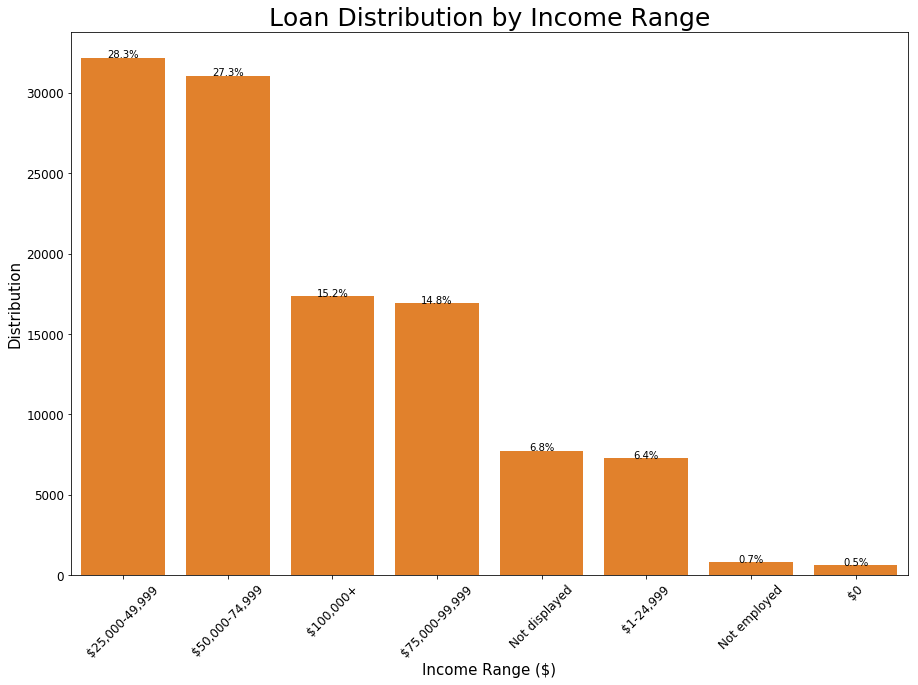

In [4]:
plt.figure(figsize = [15, 10]) 

inc_range =df_loan['IncomeRange'].value_counts().sum()
status_count=df_loan['IncomeRange'].value_counts()
status_order=status_count.index


base_color = sb.color_palette()[1]
sb.countplot(data=df_loan, x='IncomeRange', color=base_color, order=status_order)
plt.title('Loan Distribution by Income Range', fontsize=25)
plt.xlabel('Income Range ($)', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

locs, labels = plt.xticks(rotation=45) 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/inc_range)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

## Impact of Monthly Loan Payment on Loan Original Amount

### Investigations revealed that the higher the monthly loan payments, the higher the loan original amount granted. This means that there is a positive corellation between the two variables 

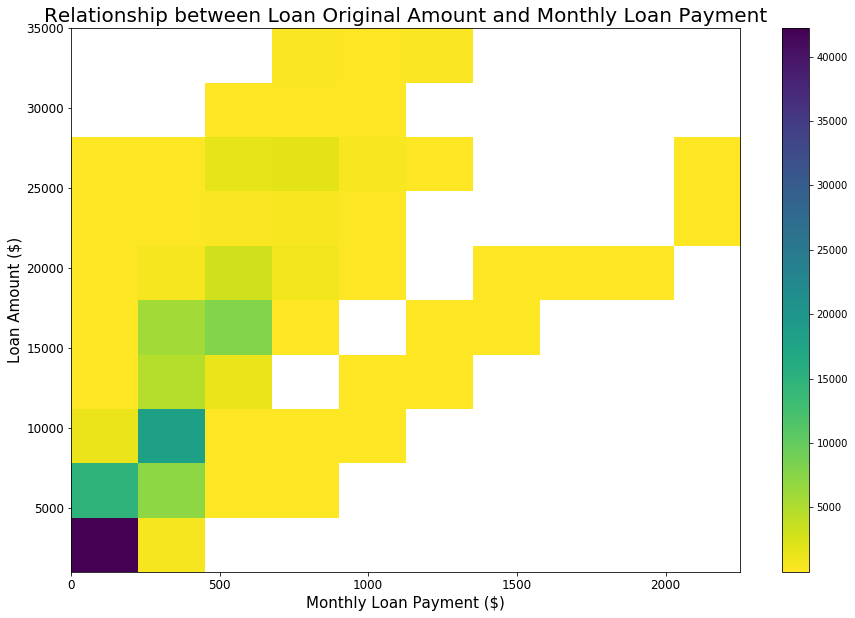

In [8]:
plt.figure(figsize = [15, 10]) 
bins_x = np.arange(0, 2500, 200)
bins_y = np.arange(350, 35000+350, 350)

plt.hist2d(data = df_loan, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Monthly Loan Payment ($)', fontsize = 15)
plt.ylabel('Loan Amount ($)', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Relationship between Loan Original Amount and Monthly Loan Payment', fontsize=20);


## Loan Distribution by Borrower Locations
### Investigations into checking if location had an impact on loan amount showed that individuals residing in certain locations took more loans than others. Findings revealed that California had the highest number of borrowers, followed closely by Florida, New York and Texas

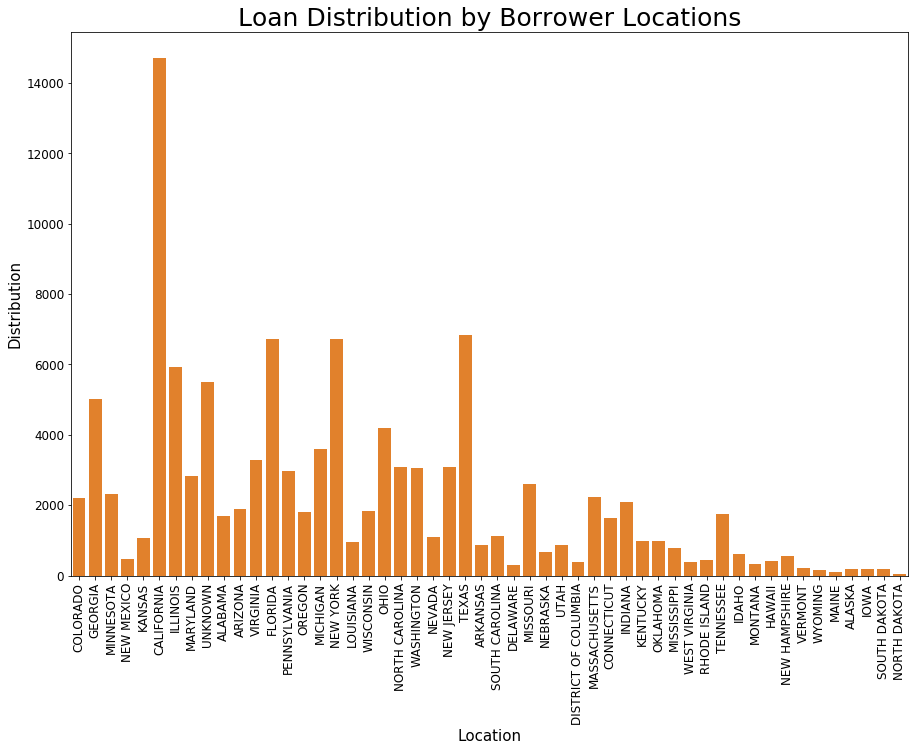

In [6]:
plt.figure(figsize = [15, 10]) 
base_color = sb.color_palette()[1]
sb.countplot(data= df_loan, x='BorrowerState', color=base_color)
plt.title('Loan Distribution by Borrower Locations', fontsize=25)
plt.xlabel('Location', fontsize = 15)
plt.ylabel('Distribution', fontsize = 15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xticks(rotation=90);

# Thank you

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 453946 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/